Runtime: 21.55


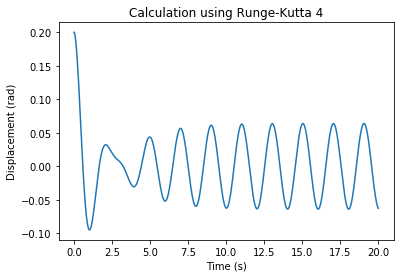

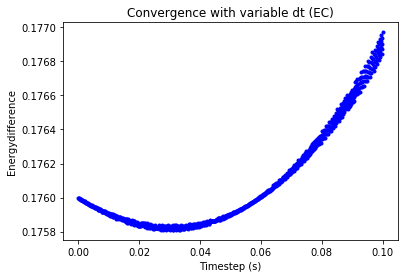

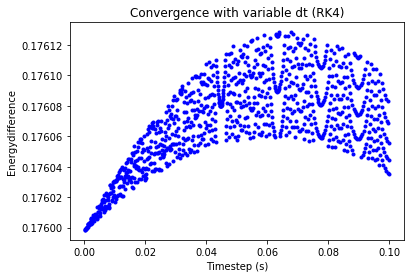

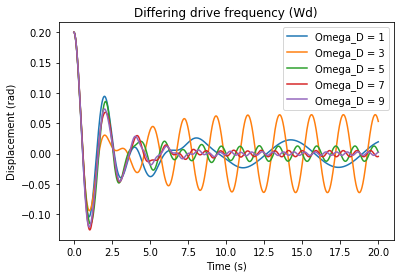

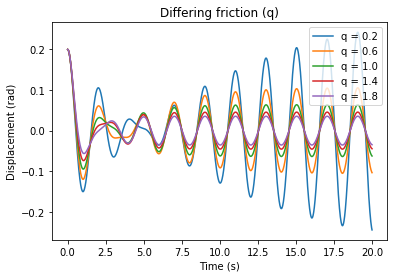

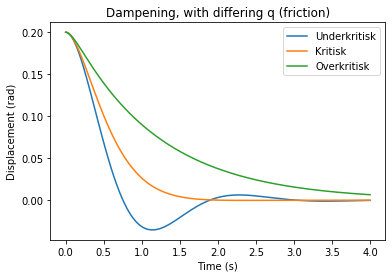

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import time

%matplotlib inline

startTime = time.time()

# Physical parameters

l = 1.0
g = 9.8
m = 1
theta_0 = 0.2
omega_0 = 0.0
q = 1.0
omega_D = 3.13
F_D = 0.2

# Timing constants

t_f = 20
t_i = 0
dt = 0.01

# FUNCTIONS

d_theta = lambda theta, omega, t : omega

d_omega = lambda theta, omega, t : F_D*np.sin(omega_D*t)-((g/l)*theta)-(q*omega)


def RK4_step(f, k, theta, w, dt, t):
    """
    Calculates one step of the RK4-algorithm.
    
    theta: float
    previous value of theta
           
    w: float
    previous value of w (omega, angular velocity)
    
    dt: float
    timestep
    
    return: two floats 
    """
    k1 = k(theta,w,t)
    f1 = f(theta,w,t)
    k2 = k(theta + (dt/2)*f1,w,t)
    f2 = f(theta,w + (dt/2)*k1,t)
    k3 = k(theta + (dt/2)*f2,w,t)
    f3 = f(theta,w + (dt/2)*k2,t)
    k4 = k(theta + dt*f3,w,t)
    f4 = f(theta,w + dt*k3,t)
    return theta + (dt/6)*(f1 + (2*f2) + (2*f3) + f4), w + (dt/6)*(k1 + (2*k2) + (2*k3) + k4)

def RK4_method(k, f, theta__0, omega__0, dt):
    """
    Computes theta and w (omega).  
    
    Parameters
    -----------
    k: RHS of equation
    f: RHS of equation
    theta0: initial value of theta
    w0: initail value of omega
    dt: timestep
    
    return theta, w, t
    """
    t = np.linspace(t_i,t_f,int(t_f/dt))
    theta = np.zeros(len(t))
    omega = np.zeros(len(t))
    
    
    theta[0],omega[0] = theta__0,omega__0
    
    for i in range(1,len(t)):
        theta[i],omega[i] = RK4_step(k, f, theta[i-1], omega[i-1], dt, t[i])
    
    return theta, omega, t


theta_RK4,omega_RK4,t_RK4 = RK4_method(d_theta, d_omega, theta_0, omega_0, dt)

plt.figure("RK4")
plt.title("Calculation using Runge-Kutta 4")
plt.plot(t_RK4,theta_RK4)
plt.xlabel("Time (s)")
plt.ylabel("Displacement (rad)")
#plt.show()


"""
Start of assignment 2
Test of convergence in dt for RK4 method
And same for Euler-Cromer method
"""

# Implementation of Euler-Cromer-method

def euler_cromer_method(theta_0, omega_0, dt):
    """
    Calculates angular displacement and angular velocity 
    using the Euler-Cromer method 
    """
    N = int(t_f/dt)
    theta = np.zeros(N)
    omega = np.zeros(N)
    t = np.linspace(0, t_f, N)
    theta[0] = theta_0
    omega[0] = omega_0
    for i in range(1,N):
        omega[i] = omega[i-1] + (F_D*np.sin(omega_D*t[i])-((g/l)*theta[i-1])-(q*omega[i-1]))*dt
        theta[i] = theta[i-1] + omega[i]*dt
    return theta, omega, t


theta_ec,omega_ec,t_ec = euler_cromer_method(theta_0,omega_0,dt)


"""
Code for plotting EC and diff(RK4,EC)
Not used in current implementation


plt.figure("EC")
plt.title("Calculation using Euler-Cromer")
plt.plot(t_ec,theta_ec,label="Displacement (rad)")
plt.legend(loc="upper right")
#plt.show()

plt.figure("Diff EC-RK4")
plt.title("Difference in calculation (EC-RK4)")
plt.plot(t_RK4,theta_ec-theta_RK4,label="Displacement (rad)")
plt.legend(loc="upper right")
#plt.show()
"""


dt_i = 0.0001
dt_f = 0.1
d_dt = dt_i

dt_arr = np.linspace(dt_i,dt_f,int(dt_f/d_dt))
conv_RK4 = np.zeros(int(dt_f/d_dt))
conv_EC = np.zeros(int(dt_f/d_dt))

# Energy functions

E_kin = lambda omega : (1/2)*m*l**2*omega**2
E_pot = lambda theta : (1/2)*m*g*l*theta**2

E_tot = lambda theta,omega : (1/2)*m*l**2*omega**2 + (1/2)*m*g*l*theta**2


for i in range(int(dt_f/d_dt)):
    theta_RK4,omega_RK4,t_RK4 = RK4_method(d_theta, d_omega, theta_0, omega_0, dt_arr[i])
    theta_EC,omega_EC,t_EC = euler_cromer_method(theta_0, omega_0, dt_arr[i])
    
    conv_RK4[i] = abs((E_kin(omega_RK4[-1]) + E_pot(theta_RK4[-1])) - (E_kin(omega_RK4[0]) + E_pot(theta_RK4[0])))
    conv_EC[i] = abs((E_kin(omega_EC[-1]) + E_pot(theta_EC[-1])) - (E_kin(omega_EC[0]) + E_pot(theta_EC[0])))


plt.figure("Convergence EC")
plt.title("Convergence with variable dt (EC)")
plt.plot(dt_arr,conv_EC,".b")
plt.xlabel("Timestep (s)")
plt.ylabel("Energydifference")
#plt.show()

plt.figure("Convergence RK4")
plt.title("Convergence with variable dt (RK4)")
plt.plot(dt_arr,conv_RK4,".b")
plt.xlabel("Timestep (s)")
plt.ylabel("Energydifference")
#plt.show()

"""
Start of assignment 3
Test for proportionality between drive frequency and resonantfrequency
omega_D
"""

omega_D_arr = [1,3,5,7,9]


plt.figure("Omega_D")
plt.title("Differing drive frequency (Wd)")
for i in range(len(omega_D_arr)):
    omega_D = omega_D_arr[i]
    theta_RK4,omega_RK4,t_RK4 = RK4_method(d_theta, d_omega, theta_0, omega_0, dt)
    plt.plot(t_RK4,theta_RK4,label="Omega_D = " + str(omega_D_arr[i]))
plt.legend(loc="upper right")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (rad)")
#plt.show()

omega_D = 3.13


"""
Start of assignment 4
Test for proportionality between frictionparameter and resonantfrequency
q
"""

q_arr = [0.2,0.6,1.0,1.4,1.8]


plt.figure("Friction")
plt.title("Differing friction (q)")
for i in range(len(q_arr)):
    q = q_arr[i]
    theta_RK4,omega_RK4,t_RK4 = RK4_method(d_theta, d_omega, theta_0, omega_0, dt)
    plt.plot(t_RK4,theta_RK4,label="q = " + str(q_arr[i]))
plt.legend(loc="upper right")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (rad)")
#plt.show()

q = 1.0


"""
Start of assignment 5
Dampening, with no drive frequency
Overcritical, critical and undercritical
"""

F_D = 0.0
t_f = 4

q_arr = [3,5.6,12]
q_arr_desc = ["Underkritisk","Kritisk","Overkritisk"]

plt.figure("Criticality")
plt.title("Dampening, with differing q (friction)")
for i in range(len(q_arr)):
    q = q_arr[i]
    theta_RK4,omega_RK4,t_RK4 = RK4_method(d_theta, d_omega, theta_0, omega_0, dt)
    plt.plot(t_RK4,theta_RK4,label=q_arr_desc[i])
plt.legend(loc="upper right")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (rad)")

endTime = time.time()
print("Runtime: " + str(endTime-startTime)[:5])
plt.show()

q = 1.0